In [1]:
import pyemu
import flopy as fp
from flopy.utils import Raster
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys


sys.path.append("../../modules")
# hand made functions
from Rouss import *

flopy is installed in C:\Users\emmal\Anaconda3\lib\site-packages\flopy


In [2]:
t_d ="master_glm"
case = "2D_test"
pst = pyemu.Pst(os.path.join(t_d,"{}.pst".format(case)))
pst.write_par_summary_table(filename="none")

,type,transform,count,initial value,upper bound,lower bound,standard deviation
cond,cond,log,6,-2.30103,-2,-3,0.25
irr__multiplier,irr__multiplier,log,14,0,0.30103,-0.09691,0.099485
kp_inst:0,kp_inst:0,log,113,0.031968 to 0.301633,1.90309,-1.30103,0.80103


[<Figure size 576x756 with 0 Axes>, <Figure size 576x756 with 8 Axes>]

<Figure size 576x756 with 0 Axes>

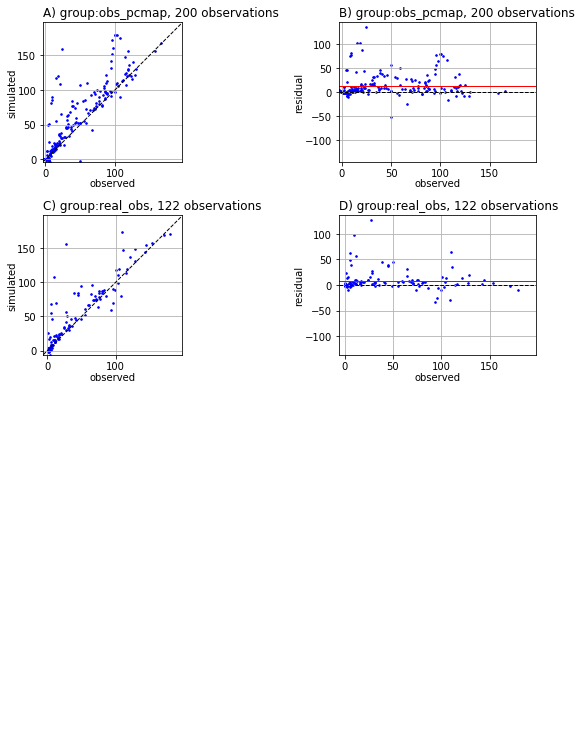

In [3]:
pst.plot(kind='1to1')

In [5]:
pst.control_data.noptmax = 7 # number of iterations (should be set to a great value (50))
pst.pestpp_options["n_iter_base"] = -1
pst.pestpp_options["n_iter_super"] = 4
pst.pestpp_options["glm_num_reals"] = 50 # how many draws
pst.pestpp_options["parcov"] = "{}.prior.cov".format(case)
pst.pestpp_options["base_jacobian"] = "{}.jcb".format(case)
pst.write(os.path.join(t_d,"{}.pst".format(case)))

noptmax:7, npar_adj:133, nnz_obs:322


In [33]:
# DO the inversion
# m_d = "master_glm_run"
# pyemu.os_utils.start_workers(t_d,"../../pestpp-glm.exe","{}.pst".format(case),num_workers=10,worker_root=".",
#                              master_dir=m_d)

[<Figure size 576x756 with 0 Axes>, <Figure size 576x756 with 8 Axes>]

<Figure size 576x756 with 0 Axes>

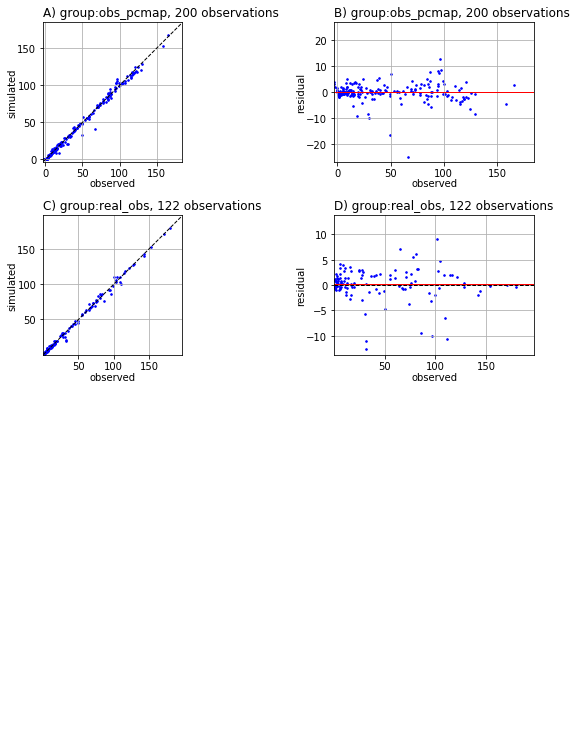

In [4]:
m_d = "master_glm_run"
pst_2 = pyemu.Pst(os.path.join(m_d,"{}.pst".format(case)))
pst_2.plot(kind="1to1")

3715.2855966007432 {'obs_pcmap': 2495.6239337902707, 'real_obs': 1219.6616628104725} {'obs_pcmap': 0.6717179255542595, 'real_obs': 0.3282820744457405}


[None,
 None,

<Figure size 576x756 with 0 Axes>

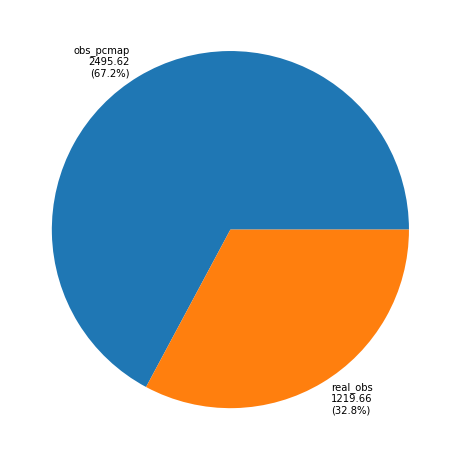

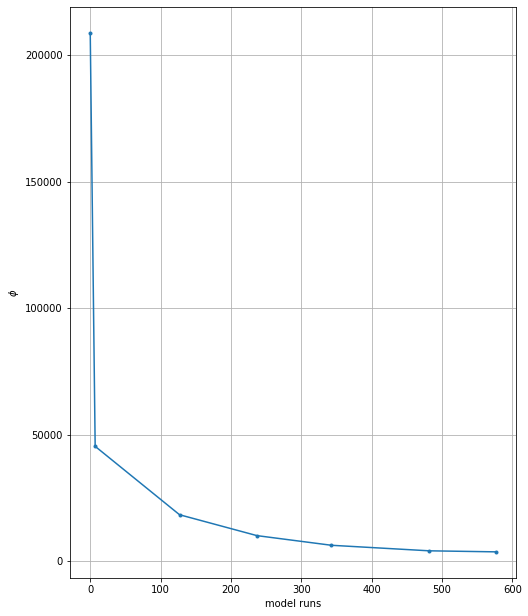

In [6]:
pst_2.plot()

C:\Users\emmal\Anaconda3\lib\site-packages\pyemu\en.py:365: UserWarning: Ensemble.from_dataframe() is deprecated and has been replaced with the standard constructor, which takesthe same arguments
  warnings.warn("Ensemble.from_dataframe() is deprecated and has been "


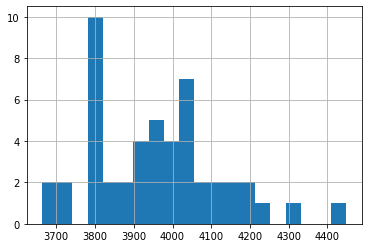

In [5]:
df = df=pd.read_csv(os.path.join(m_d,"{}.post.obsen.csv".format(case)),index_col=0)
oe = pyemu.ObservationEnsemble.from_dataframe(pst=pst,df=df)

ax = oe.phi_vector[oe.phi_vector<1e4].hist(bins=20)

In [8]:
dfp = df=pd.read_csv(os.path.join(m_d,"{}.par.usum.csv".format(case)),index_col=0)
dfp.head()

,prior_mean,prior_stdev,prior_lower_bound,prior_upper_bound,post_mean,post_stdev,post_lower_bound,post_upper_bound
name,,,,,,,,
KP_INST:0_I:31_J:121,0.0,0.337744,-0.675488,0.675488,1.567230,0.301633,0.963961,2.170490
KP_INST:0_I:40_J:112,0.0,0.337744,-0.675488,0.675488,-1.301030,0.151015,-1.603060,-0.999001
KP_INST:0_I:40_J:121,0.0,0.337744,-0.675488,0.675488,-1.301030,0.274095,-1.849220,-0.752840
KP_INST:0_I:49_J:103,0.0,0.337744,-0.675488,0.675488,0.693694,0.040282,0.613130,0.774257
KP_INST:0_I:49_J:112,0.0,0.337744,-0.675488,0.675488,0.869682,0.165062,0.539559,1.199810


[Text(0.5, 1.0, 'Post standard deviation distribution (multiplier)')]

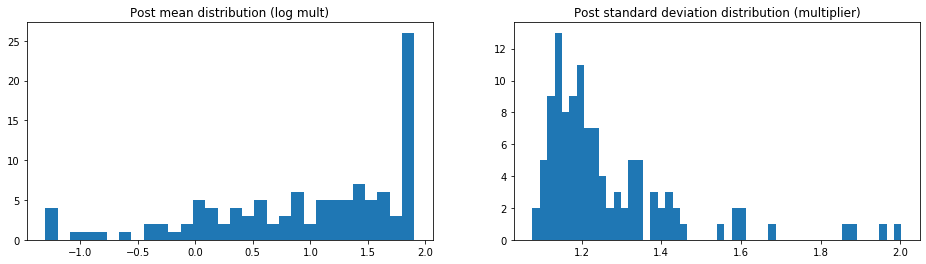

In [9]:
idx = [i for i in dfp.index if "KP" in i]
fig,ax=plt.subplots(1,2,figsize=(16,4))

ax[0].hist(dfp.loc[idx]["post_mean"],bins=30)
ax[0].set(title="Post mean distribution (log mult)")
ax[1].hist(10**dfp.loc[idx]["post_stdev"],bins=50)
ax[1].set(title="Post standard deviation distribution (multiplier)")

In [18]:
pst_2.parameter_data.parval1.iloc[:113]

parnme
kp_inst:0_i:31_j:121     2.002779
kp_inst:0_i:40_j:112     1.415843
kp_inst:0_i:40_j:121     1.879728
kp_inst:0_i:49_j:103     1.097190
kp_inst:0_i:49_j:112     1.462386
                           ...   
kp_inst:0_i:157_j:121    1.199579
kp_inst:0_i:166_j:58     1.340078
kp_inst:0_i:166_j:103    1.110228
kp_inst:0_i:175_j:49     1.963044
kp_inst:0_i:175_j:58     1.608196
Name: parval1, Length: 113, dtype: float64

In [10]:
#kriging standard dev
pst_2.parameter_data.parval1.iloc[:113] = 10**dfp["post_stdev"].values[:113]
pst_2.control_data.noptmax = 0 # one run
pst_2.write(os.path.join(t_d,"{}.pst".format(case)))
pyemu.os_utils.run("..\..\pestpp-glm.exe {}".format(case),cwd=t_d)
kstd = np.loadtxt(os.path.join(t_d,"k.txt"))
kstd[kstd == kstd[0,0]] = None

#kriging kmax
pst_2.parameter_data.parval1 = 10**dfp["post_upper_bound"].values
pst_2.control_data.noptmax = 0 # one run
pst_2.write(os.path.join(t_d,"{}.pst".format(case)))
pyemu.os_utils.run("..\..\pestpp-glm.exe {}".format(case),cwd=t_d)
kmax = np.loadtxt(os.path.join(t_d,"k.txt"))
kmax[np.isnan(kstd)] = None

#kriging kmin
pst_2.parameter_data.parval1 = 10**dfp["post_lower_bound"].values
pst_2.control_data.noptmax = 0 # one run
pst_2.write(os.path.join(t_d,"{}.pst".format(case)))
pyemu.os_utils.run("..\..\pestpp-glm.exe {}".format(case),cwd=t_d)
kmin = np.loadtxt(os.path.join(t_d,"k.txt"))
kmin[np.isnan(kstd)] = None

#kriging k to plot
pst_2.parameter_data.parval1 = 10**dfp["post_mean"].values
pst_2.control_data.noptmax = 0 # one run
pst_2.write(os.path.join(t_d,"{}.pst".format(case)))
pyemu.os_utils.run("..\..\pestpp-glm.exe {}".format(case),cwd=t_d)

k = np.log10(np.loadtxt(os.path.join(t_d,"k.txt")))
k[np.isnan(kstd)] = None

C:\Users\emmal\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


noptmax:0, npar_adj:133, nnz_obs:322
noptmax:0, npar_adj:133, nnz_obs:322
noptmax:0, npar_adj:133, nnz_obs:322
noptmax:0, npar_adj:133, nnz_obs:322


[Text(0.5, 1.0, 'Kmin log')]

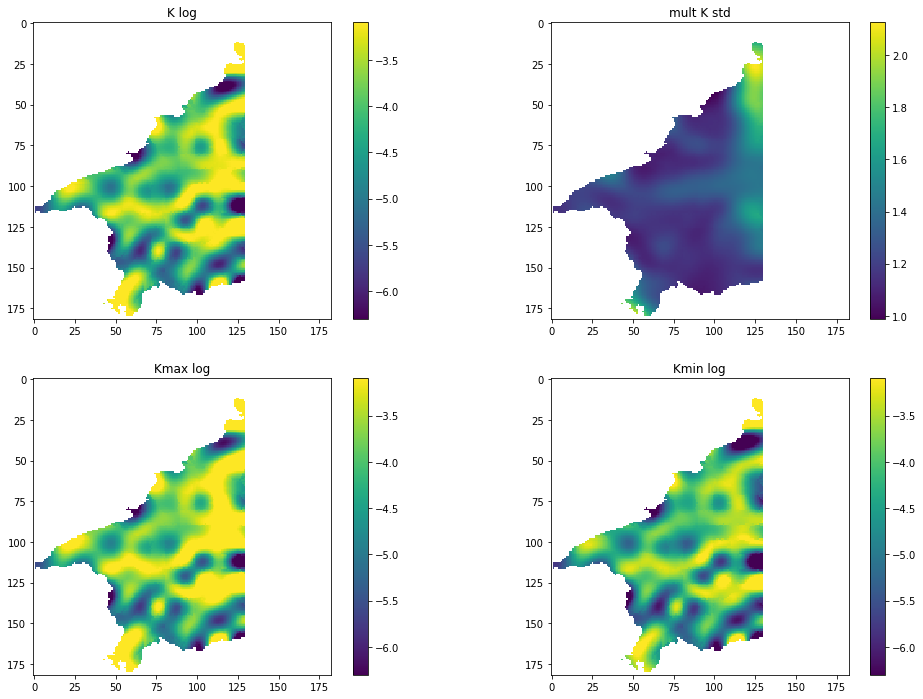

In [11]:
# inversion
fig,ax = plt.subplots(2,2,figsize=(17,12))
a1 = ax[0,0].imshow(k)
fig.colorbar(a1,ax=ax[0,0])
ax[0,0].set(title="K log")

a2 = ax[0,1].imshow(kstd/1e-5)
fig.colorbar(a2,ax=ax[0,1])
ax[0,1].set(title="mult K std")

a3 = ax[1,0].imshow(np.log10(kmax))
fig.colorbar(a3,ax=ax[1,0])
ax[1,0].set(title="Kmax log")

a4 = ax[1,1].imshow(np.log10(kmin))
fig.colorbar(a4,ax=ax[1,1])
ax[1,1].set(title="Kmin log")

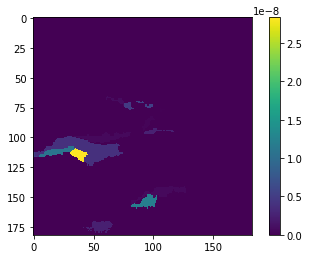

In [15]:
plt.imshow((np.loadtxt(os.path.join(t_d,"irr.txt"))))
plt.colorbar()

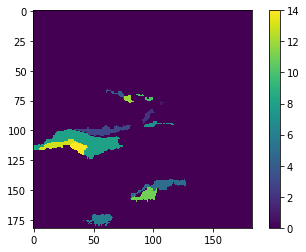

In [74]:
plt.imshow((np.loadtxt(os.path.join(t_d,"zone_irr.txt"))))
plt.colorbar()

In [16]:
m_n_i = "pest_2d_r"
m_n = "PEST_2D_R"
sim = fp.mf6.MFSimulation.load(sim_ws="workspace")
m = sim.get_model(m_n_i)

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package oc...
    loading package obs...
    loading package npf...
    loading package rch...
    loading package rch...
    loading package rch...
    loading package wel...
    loading package wel...
    loading package chd...
    loading package chd...
    loading package drn...
    loading package riv...
    loading package riv...
    loading package riv...
    loading package riv...
    loading package riv...
    loading package riv...
  loading ims package pest_2d_r...


In [17]:
grid = m.modelgrid
pz="../../data/cartes_pz/Piézo_Pliocène_1990_V2.grd"
rast = Raster.load(pz)
Mes_pz = rast.resample_to_grid(grid.xcellcenters,grid.ycellcenters,1)

In [20]:
rivfiles = [os.path.splitext(riv)[0] for riv in os.listdir("workspace") if riv.endswith(".riv")]

C:\Users\emmal\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


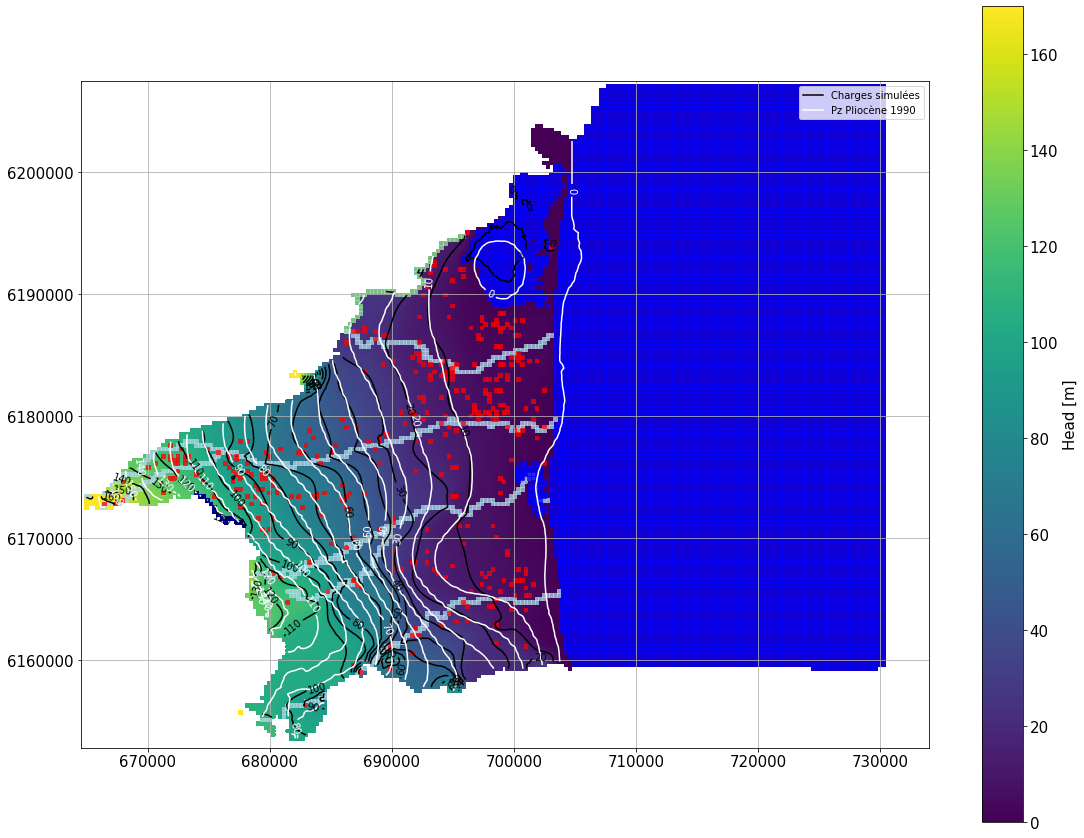

In [21]:

head = get_heads("pest_2D_R",t_d)

# initialize plot
fig = plt.figure(figsize=(19,15))
layer = 0
ax  = plt.subplot(1, 1,1, aspect='equal')
ml = fp.plot.PlotMapView(model=m,layer=layer)

#plot heads
hmesh = ml.plot_array(head[layer],masked_values=[0,1e30],cmap="viridis")
hmesh.set_clim(0,170)
cont = ml.contour_array(head[layer],masked_values=[0,1e30],levels=np.linspace(0,170,18),colors='black')
plt.clabel(cont,fmt="%1i")

##cont des mesures piézométriques
Mes_pz[[head[layer]==1e30]]=None
cont_2=ml.contour_array(Mes_pz,levels=np.linspace(0,170,18),colors='white')
plt.clabel(cont_2,fmt="%1i")

#legend
proxy = [plt.Line2D((0,1),(0,0),color="black"),plt.Line2D((0,1),(0,0),color="white")]
plt.legend(proxy,["Charges simulées","Pz Pliocène 1990"])

# plot bc
ml.plot_bc("sea",color="b",alpha=0.5)
for riv in rivfiles:
    ml.plot_bc(riv,color="lightblue",alpha=0.5)
ml.plot_bc("eta",color="b",alpha=0.5)
ml.plot_bc("wel",alpha=0.5)
ml.plot_bc("Corb",color="lightgreen",alpha=0.5)
ml.plot_bc("thuir",color="darkblue",alpha=1)

ax.tick_params(labelsize=15)

#colorbar
g = plt.colorbar(hmesh)
g.set_label("Head [m]",fontsize=15)
g.ax.tick_params(labelsize=15)

ax.grid()

In [22]:
def mae(x):
    return np.sum(np.abs(x))/x.shape[0]
x = pst_2.res.residual.values
mae(x)

2.070826479069149

C:\Users\emmal\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\emmal\Anaconda3\lib\site-packages\xlrd\xlsx.py:312: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\emmal\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


MAE : 2.0421440834858253 m 
RMSE : 3.1362339487770874
phi : 1219.6594593012783


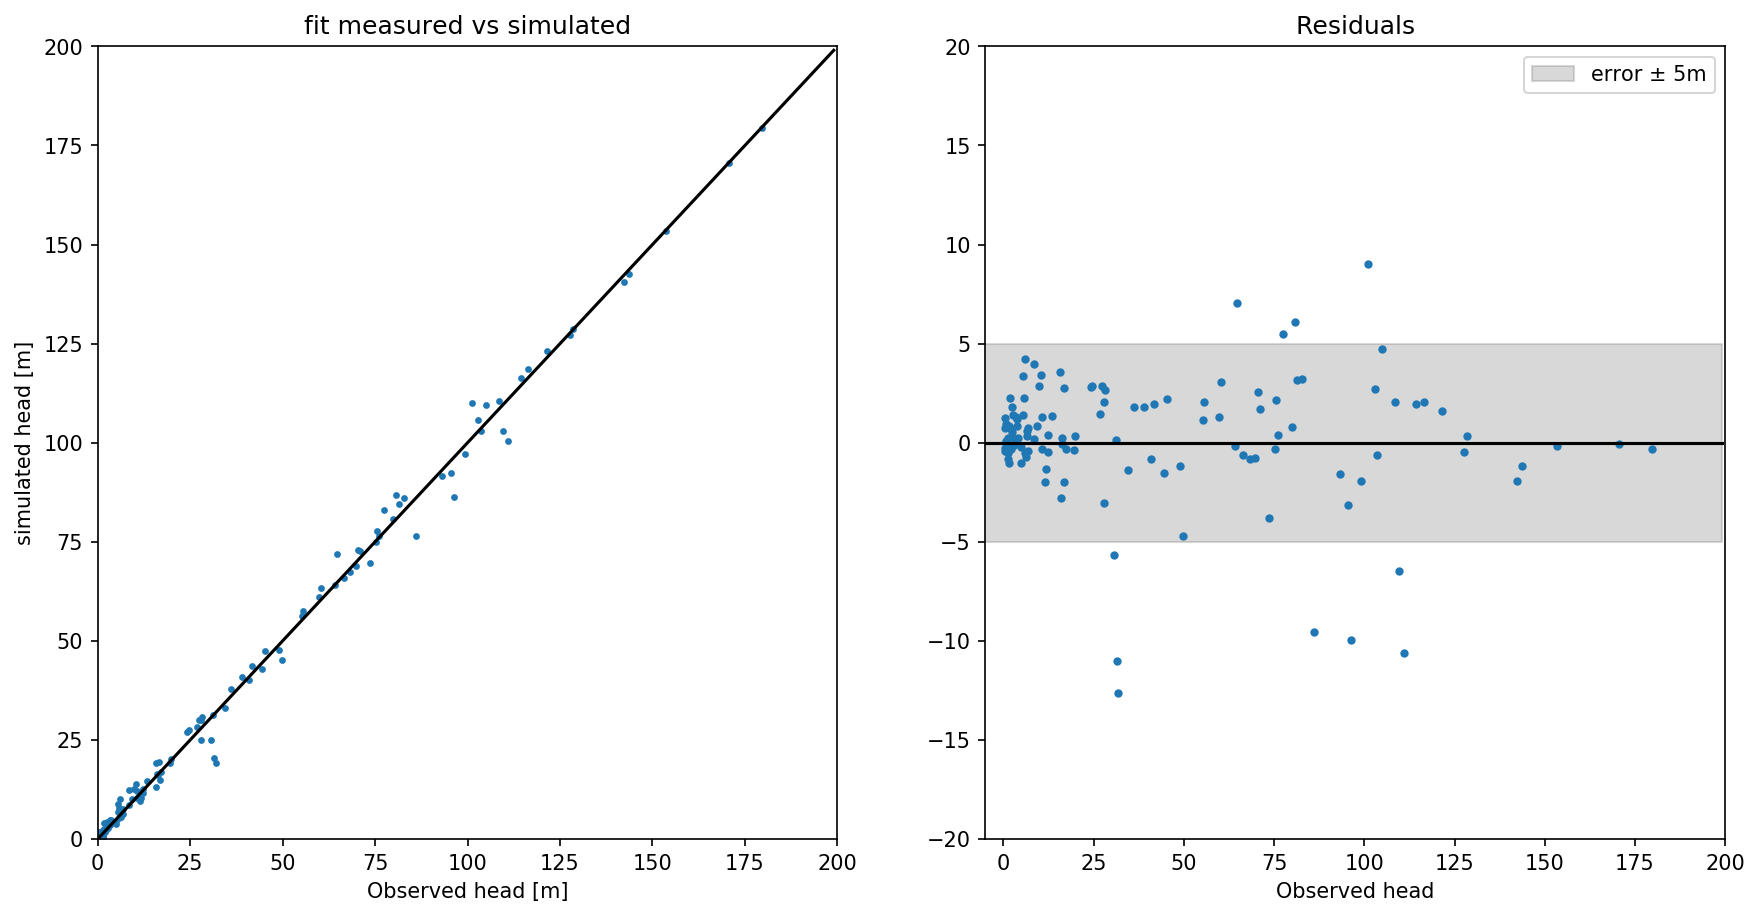

In [25]:
## plot errors and residuals

# control piezos
piez_path="../../data/piezos/pz_hydriad.xlsx"
#import the data using this function (path,modelgrid, sheetname of the data,piezometric level column, x and y coor (in L93 !))
Control_pz = importControlPz(piez_path,grid,sheetName="2012",np_col="NP_Avril2013",x_col="x",y_col="y")

# retrieve heads and spdis 
fig,ax = plt.subplots(1,2,figsize=(14,7),dpi=150)

head = get_heads(m_n,t_d)
head[head>1000]=None
i=0
ax[i].scatter(Control_pz[Control_pz!=0],
            head[0][Control_pz!=0],s=5)
ax[i].plot(np.arange(-10,200),np.arange(-10,200),"k")
ax[i].set(xlabel="Observed head [m]",ylabel="simulated head [m]",title="fit measured vs simulated",
         xlim=(0,200),ylim=(0,200))

i=1
ax[i].plot(Control_pz[Control_pz!=0],head[0][Control_pz!=0]-Control_pz[Control_pz!=0],".")

xfit = np.arange(-10,200)
yfit = np.zeros([210])
dyfit = 5
ax[i].fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.3,label="error ± 5m")
ax[i].plot(xfit,yfit,"k")
ax[i].set(xlim=(-5,200),ylim=(-20,20),title="Residuals",xlabel="Observed head")
plt.legend()

Misfit = np.abs((Control_pz[Control_pz!=0] - head[0][Control_pz!=0]))
print("MAE : {} m ".format(np.nanmean(Misfit)))
Misfit2 = (np.nansum((((Control_pz[Control_pz!=0] - head[0][Control_pz!=0])**2)/Control_pz[Control_pz!=0].shape[0])))**0.5
print("RMSE : {}".format(Misfit2))
phi = np.nansum((Control_pz[Control_pz!=0] - head[0][Control_pz!=0])**2)
print("phi : {}".format(phi))